In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [30]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [42]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rikitea pf
yellowknife ca
torbay ca
sorvag fo
dahod in
kahului us
rikitea pf
mahebourg mu
puerto ayora ec
nikolskoye ru
kloulklubed pw
rikitea pf
tsihombe mg
illoqqortoormiut gl
bathsheba bb
katsuura jp
carbonia it
atuona pf
fortuna us
mataura pf
goderich sl
lorengau pg
nome us
port elizabeth za
vaini to
roebourne au
rudsar ir
douentza ml
illoqqortoormiut gl
carnarvon au
sabang id
severo-kurilsk ru
cape town za
bethel us
taolanaro mg
albany au
east london za
ushuaia ar
amderma ru
chokurdakh ru
kenai us
hobart au
channel-port aux basques ca
mataura pf
talnakh ru
san patricio mx
kaitangata nz
castro cl
lagoa pt
kaitangata nz
punta arenas cl
storsteinnes no
dikson ru
kunya ru
samusu ws
constitucion mx
tasiilaq gl
lata sb
barentsburg sj
puerto ayora ec
rikitea pf
bam ir
mataura pf
lavrentiya ru
vaini to
port hedland au
jamestown sh
bluff nz
xichang cn
arraial do cabo br
turukhansk ru
vaini to
mopti ml
taolanaro mg
puerto ayora ec
taolanaro mg
port alfred za
palabuhanratu id
faenza it
bluff

kapaa us
padang id
dzerzhinskoye ru
bandarbeyla so
akdepe tm
bredasdorp za
rikitea pf
shache cn
ushuaia ar
rikitea pf
port elizabeth za
kayes ml
port-cartier ca
lincoln nz
kodiak us
clyde river ca
banjar id
qaanaaq gl
hami cn
belmonte br
busselton au
trairi br
imbituba br
ushuaia ar
cabo san lucas mx
bluff nz
sitangkai ph
lebu cl
rikitea pf
norman wells ca
ushuaia ar
punta arenas cl
manzil tamim tn
la romana do
cuddapah in
waipawa nz
taolanaro mg
lowestoft gb
powell river ca
punta arenas cl
ribeira grande pt
petropavlovsk-kamchatskiy ru
bluff nz
puerto quijarro bo
pangai to
karratha au
quatre cocos mu
cabedelo br
bluff nz
komsomolskiy ru
bredasdorp za
victoria falls zw
hilo us
grindavik is
ushuaia ar
atuona pf
umm durman sd
illoqqortoormiut gl
rikitea pf
albany au
isangel vu
ampanihy mg
castro cl
punta arenas cl
avarua ck
kapaa us
butaritari ki
guarapari br
tucuman ar
udachnyy ru
thompson ca
rafraf tn
honningsvag no
arona es
berlevag no
port blair in
los llanos de aridane es
afmadu so


meyungs pw
hermanus za
miri my
busselton au
vaini to
lebu cl
rikitea pf
scottsbluff us
taolanaro mg
vaini to
ribeira grande pt
chokurdakh ru
nikolskoye ru
elizabeth city us
vaini to
gushikawa jp
hermanus za
rock sound bs
cherskiy ru
cidreira br
luderitz na
bajo baudo co
sindor ru
broken hill au


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
print(cities)

['rikitea', 'yellowknife', 'torbay', 'sorvag', 'dahod', 'kahului', 'mahebourg', 'puerto ayora', 'nikolskoye', 'kloulklubed', 'tsihombe', 'illoqqortoormiut', 'bathsheba', 'katsuura', 'carbonia', 'atuona', 'fortuna', 'mataura', 'goderich', 'lorengau', 'nome', 'port elizabeth', 'vaini', 'roebourne', 'rudsar', 'douentza', 'carnarvon', 'sabang', 'severo-kurilsk', 'cape town', 'bethel', 'taolanaro', 'albany', 'east london', 'ushuaia', 'amderma', 'chokurdakh', 'kenai', 'hobart', 'channel-port aux basques', 'talnakh', 'san patricio', 'kaitangata', 'castro', 'lagoa', 'punta arenas', 'storsteinnes', 'dikson', 'kunya', 'samusu', 'constitucion', 'tasiilaq', 'lata', 'barentsburg', 'bam', 'lavrentiya', 'port hedland', 'jamestown', 'bluff', 'xichang', 'arraial do cabo', 'turukhansk', 'mopti', 'port alfred', 'palabuhanratu', 'faenza', 'kabo', 'baykit', 'itoman', 'vaitupu', 'busselton', 'bacuit', 'khash', 'lupiro', 'cayenne', 'grand river south east', 'sosva', 'labuhan', 'bonavista', 'saint-paul', 'nar

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=890b37e317522dec6b6ee3d182652727


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [19]:
# Create an endpoint URL for a city.
city_data = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 44.35,
  'feels_like': 35.8,
  'temp_min': 42.39,
  'temp_max': 47.32,
  'pressure': 1015,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 21.85, 'deg': 310, 'gust': 28.77},
 'clouds': {'all': 100},
 'dt': 1650216492,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1650189594,
  'sunset': 1650238035},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [20]:
boston_data = city_weather.json()

In [24]:
boston_data['sys']['country']

'US'

In [26]:
lat = boston_data['coord']['lat']
lng = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 47.32 58 100 21.85


In [28]:
# Import the datetime module from the datetime library.
# from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-04-17 17:28:12'

In [ ]:
#######     GET THE WEATHER CITY DATA:     ###########
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#    Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
#    City, country, and date
#    Latitude and longitude
#    Maximum temperature
#    Humidity
#    Cloudiness
#    Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [31]:
# # Create an empty list to hold the weather data.
# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters.
# record_count = 1
# set_count = 1

# # Loop through all the cities in the list.
# for i, city in enumerate(cities):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1
    
#     # Run an API request for each of the cities.
#     try:
#         # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city.
#     except:
#         print("City not found. Skipping...")
#         pass

# # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | sorvag
City not found. Skipping...
Processing Record 5 of Set 1 | dahod
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | kloulklubed
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | carbonia
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | goderich
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | nome

Processing Record 36 of Set 4 | ciudad bolivar
Processing Record 37 of Set 4 | allapalli
Processing Record 38 of Set 4 | boma
Processing Record 39 of Set 4 | broadford
Processing Record 40 of Set 4 | severnyy
Processing Record 41 of Set 4 | temaraia
City not found. Skipping...
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | rungata
City not found. Skipping...
Processing Record 44 of Set 4 | beyneu
Processing Record 45 of Set 4 | tautira
Processing Record 46 of Set 4 | ostrovnoy
Processing Record 47 of Set 4 | westfield
Processing Record 48 of Set 4 | okhotsk
Processing Record 49 of Set 4 | silyanah
City not found. Skipping...
Processing Record 50 of Set 4 | comodoro rivadavia
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | mehamn
Processing Record 3 of Set 5 | shache
Processing Record 4 of Set 5 | abu samrah
Processing Record 5 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 5 | nizhneyansk
City not found. Skip

Processing Record 24 of Set 8 | troitskoye
Processing Record 25 of Set 8 | aktau
Processing Record 26 of Set 8 | santa ines
Processing Record 27 of Set 8 | maniitsoq
Processing Record 28 of Set 8 | galesong
Processing Record 29 of Set 8 | praia da vitoria
Processing Record 30 of Set 8 | carutapera
Processing Record 31 of Set 8 | sarakhs
Processing Record 32 of Set 8 | parintins
Processing Record 33 of Set 8 | guarda
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | sept-iles
Processing Record 36 of Set 8 | chicama
Processing Record 37 of Set 8 | olinda
Processing Record 38 of Set 8 | saint-philippe
Processing Record 39 of Set 8 | anchorage
Processing Record 40 of Set 8 | bratsk
Processing Record 41 of Set 8 | roma
Processing Record 42 of Set 8 | mayo
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 8 | general pico
Processing Record 46 of Set 8 | 

Processing Record 13 of Set 12 | isla mujeres
Processing Record 14 of Set 12 | tra vinh
Processing Record 15 of Set 12 | abu dhabi
Processing Record 16 of Set 12 | mandvi
Processing Record 17 of Set 12 | palauig
Processing Record 18 of Set 12 | dauphin
Processing Record 19 of Set 12 | gerash
Processing Record 20 of Set 12 | stillwater
Processing Record 21 of Set 12 | eureka
Processing Record 22 of Set 12 | kiruna
Processing Record 23 of Set 12 | severo-yeniseyskiy
Processing Record 24 of Set 12 | santa marta
Processing Record 25 of Set 12 | ust-nera
Processing Record 26 of Set 12 | iskateley
Processing Record 27 of Set 12 | aquiraz
Processing Record 28 of Set 12 | makakilo city
Processing Record 29 of Set 12 | san jose
Processing Record 30 of Set 12 | nemuro
Processing Record 31 of Set 12 | yahotyn
Processing Record 32 of Set 12 | falealupo
City not found. Skipping...
Processing Record 33 of Set 12 | mount isa
Processing Record 34 of Set 12 | banes
Processing Record 35 of Set 12 | rose

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.03,70,3,13.27,PF,2022-04-17 18:11:03
1,Yellowknife,62.4560,-114.3525,12.56,47,68,10.00,CA,2022-04-17 18:11:03
2,Torbay,47.6666,-52.7314,49.28,92,100,29.93,CA,2022-04-17 18:11:03
3,Dahod,22.8333,74.2667,84.94,25,0,10.22,IN,2022-04-17 18:11:04
4,Kahului,20.8947,-156.4700,77.02,72,20,13.80,US,2022-04-17 18:11:04
5,Mahebourg,-20.4081,57.7000,77.29,100,40,3.44,MU,2022-04-17 18:11:04
6,Puerto Ayora,-0.7393,-90.3518,78.76,84,84,9.80,EC,2022-04-17 18:11:05
7,Nikolskoye,59.7035,30.7861,39.09,76,78,3.71,RU,2022-04-17 18:11:05
8,Kloulklubed,7.0419,134.2556,73.90,71,86,2.06,PW,2022-04-17 18:11:06
9,Bathsheba,13.2167,-59.5167,81.07,70,80,18.34,BB,2022-04-17 18:11:06


In [34]:
#Re-order the columns:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-04-17 18:11:03,-23.1203,-134.9692,78.03,70,3,13.27
1,Yellowknife,CA,2022-04-17 18:11:03,62.4560,-114.3525,12.56,47,68,10.00
2,Torbay,CA,2022-04-17 18:11:03,47.6666,-52.7314,49.28,92,100,29.93
3,Dahod,IN,2022-04-17 18:11:04,22.8333,74.2667,84.94,25,0,10.22
4,Kahului,US,2022-04-17 18:11:04,20.8947,-156.4700,77.02,72,20,13.80


In [35]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

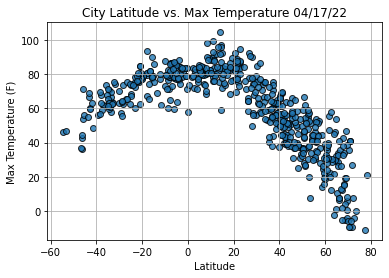

In [37]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

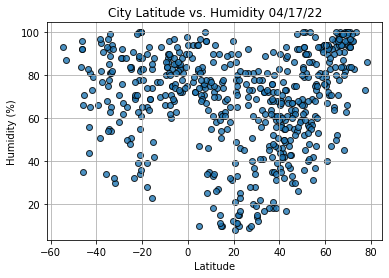

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig2.png")

# Show plot.
plt.show()

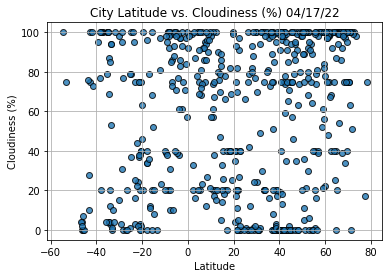

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig3.png")

# Show plot.
plt.show()

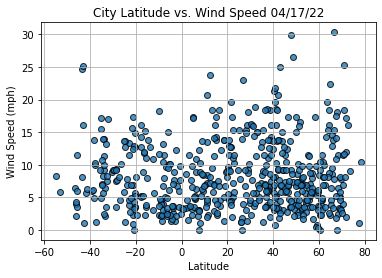

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig4.png")

# Show plot.
plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [46]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

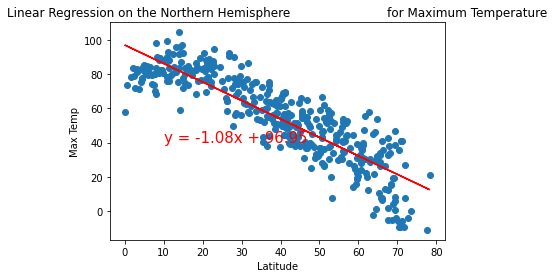

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

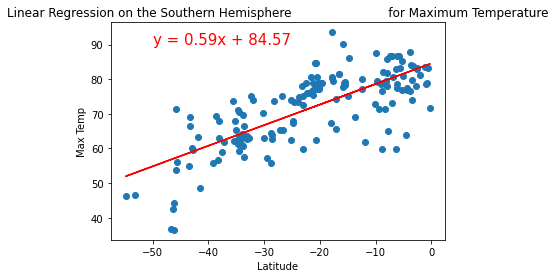

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

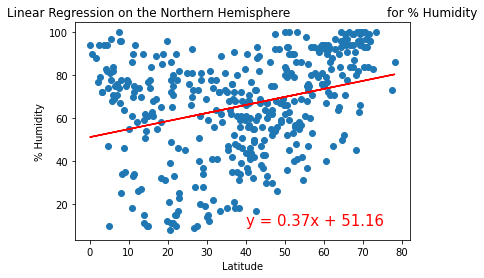

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

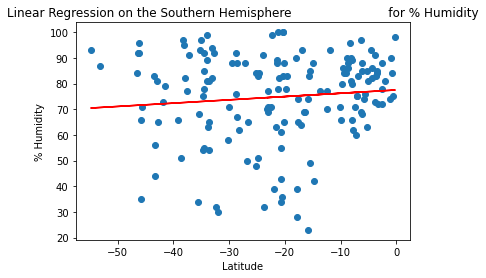

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

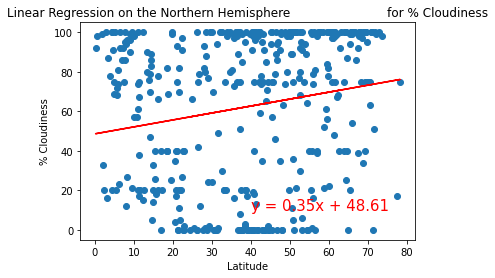

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

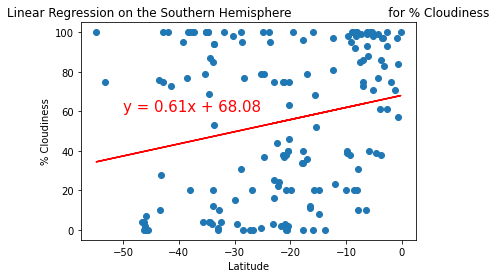

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

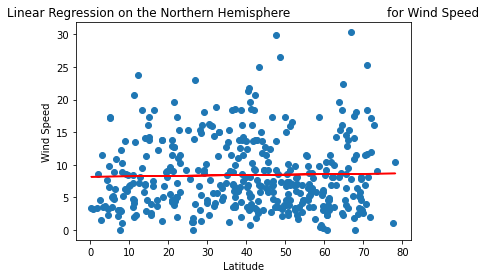

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

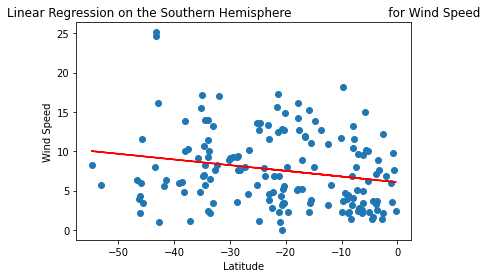

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: invalid syntax (Temp/ipykernel_824/2820615700.py, line 1)